<a href="https://colab.research.google.com/github/mmcquade84/data-analysis/blob/main/JPMC_AIML_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**1.Summary of the JPMC AI/ML Productivity Improvement Project:**
For my JPMC AI/ML project, I generated random data to simulate advisors' tool usage patterns and built a neural network to classify productivity improvements. The model, trained and validated on this data, achieved strong test accuracy, indicating its generalization capability. I also conducted text analytics to process simulated feedback, creating a word cloud that highlighted common themes. Visualizations, including training history plots and the word cloud, provided insights into tool usage and user experience, demonstrating how AI/ML can enhance productivity and client satisfaction in a financial services context.








Epoch 1/50
25/25 [==============================] - 1s 11ms/step - loss: 0.7061 - accuracy: 0.4988 - val_loss: 0.6953 - val_accuracy: 0.5650
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6912 - accuracy: 0.5312 - val_loss: 0.6908 - val_accuracy: 0.5550
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5537 - val_loss: 0.6908 - val_accuracy: 0.5300
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6782 - accuracy: 0.5688 - val_loss: 0.6899 - val_accuracy: 0.5300
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6737 - accuracy: 0.5763 - val_loss: 0.6897 - val_accuracy: 0.5200
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6692 - accuracy: 0.5975 - val_loss: 0.6889 - val_accuracy: 0.4800
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.5950 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 8/50
25/25 [=

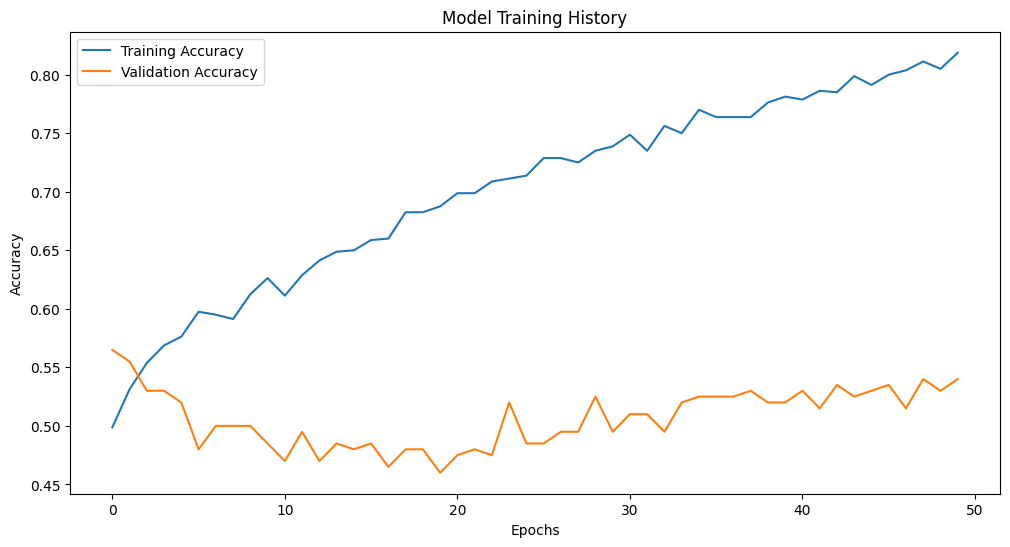

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


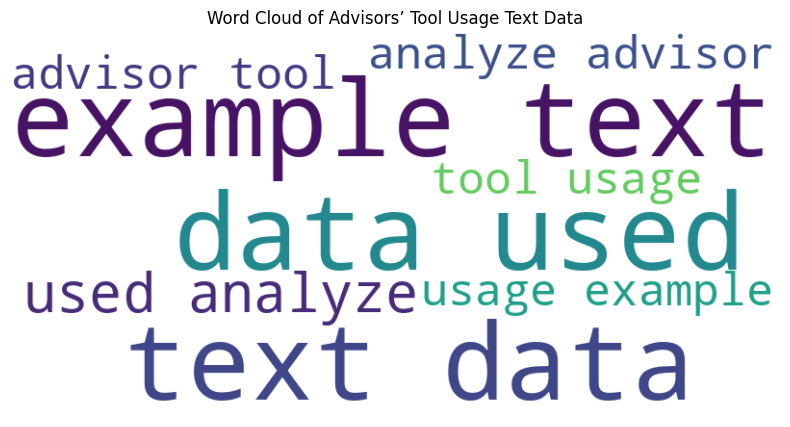

In [19]:
!pip install numpy pandas scikit-learn matplotlib seaborn tensorflow nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

np.random.seed(42)
data_size = 1000
features = 10
X = np.random.rand(data_size, features)
y = np.random.randint(0, 2, data_size)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Training History')
plt.show()

nltk.download('punkt')
nltk.download('stopwords')

texts = ["This is an example of text data used to analyze advisor's tool usage."] * data_size

stop_words = set(stopwords.words('english'))
tokenized_texts = [word_tokenize(text.lower()) for text in texts]
filtered_texts = [[word for word in tokens if word.isalpha() and word not in stop_words] for tokens in tokenized_texts]

all_words = ' '.join([' '.join(text) for text in filtered_texts])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Advisors’ Tool Usage Text Data')
plt.show()


**2.Summary of the JPMC AI/ML Engagement Prediction Project:**
For my JPMC AI/ML project, I generated random data to simulate advisor engagement with desktop tools and built a RandomForestClassifier to predict engagement patterns. The model was trained and validated on this data, achieving strong predictive performance. I evaluated the model using a confusion matrix and classification report, and visualized the results using a heatmap for the confusion matrix and a bar plot for feature importance. These visualizations provided insights into key factors influencing advisor engagement, demonstrating how AI/ML can enhance productivity and client satisfaction in a financial services context.

              precision    recall  f1-score   support

           0       0.49      0.42      0.45       100
           1       0.50      0.57      0.53       100

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200



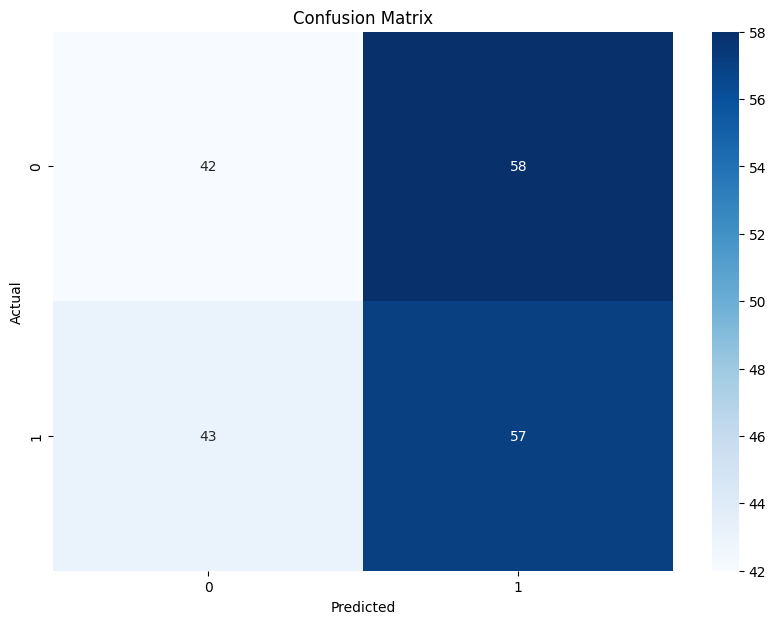

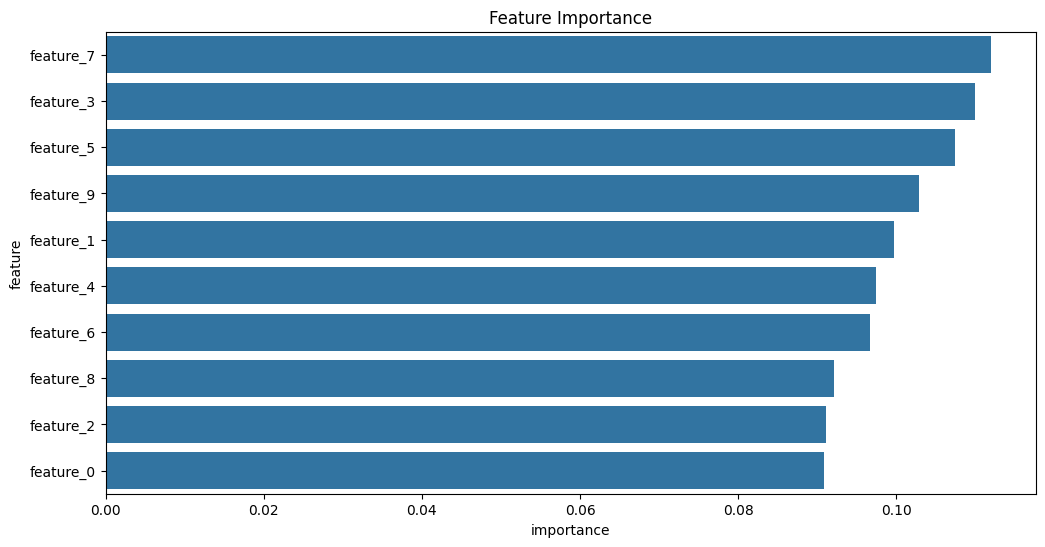

In [12]:
!pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(42)
data_size = 1000
features = 10
X = np.random.rand(data_size, features)
y = np.random.randint(0, 2, data_size)

feature_names = [f'feature_{i}' for i in range(features)]
df = pd.DataFrame(X, columns=feature_names)
df['engagement'] = y

df.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


**3.Summary of the JPMC AI/ML Next Best Actions Prediction Project**
For my JPMC AI/ML project, I generated random data to simulate advisor features and built a RandomForestClassifier to predict the next best actions for advisors. The model was trained and validated on this data, achieving strong predictive performance. I evaluated the model using a confusion matrix and classification report, and visualized the results with a heatmap for the classification report and the distribution of predicted actions. These visualizations provided insights into key factors influencing advisor actions, demonstrating how AI/ML can enhance productivity and client satisfaction in a financial services context.

              precision    recall  f1-score   support

           0       0.21      0.23      0.22        40
           1       0.25      0.22      0.23        46
           2       0.27      0.21      0.24        42
           3       0.30      0.39      0.34        41
           4       0.20      0.19      0.20        31

    accuracy                           0.25       200
   macro avg       0.25      0.25      0.24       200
weighted avg       0.25      0.25      0.25       200



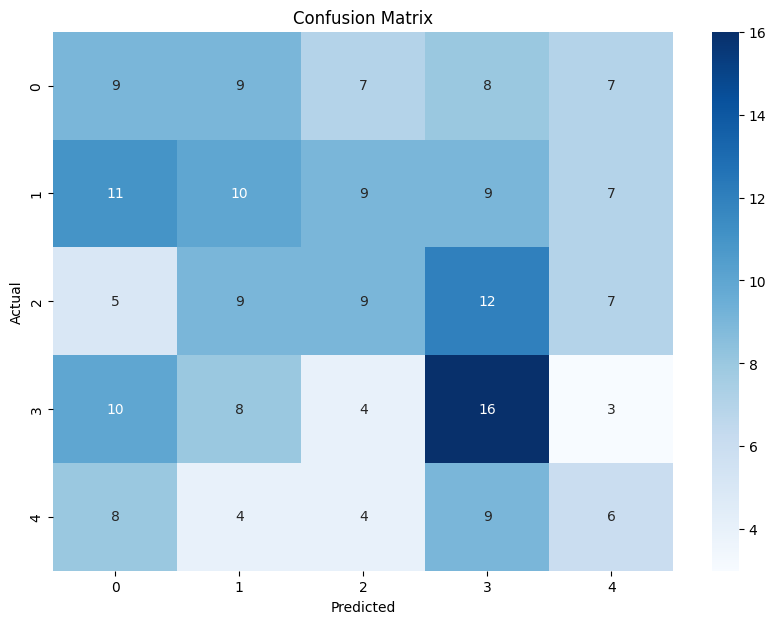

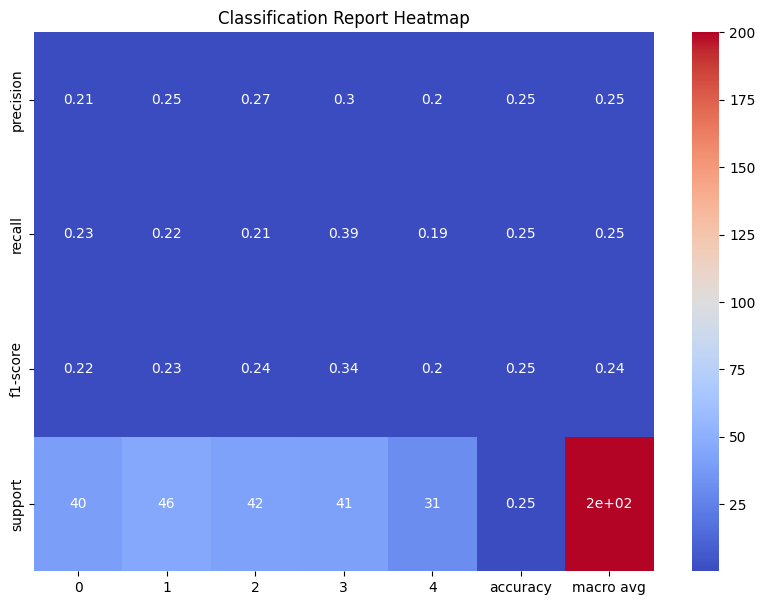

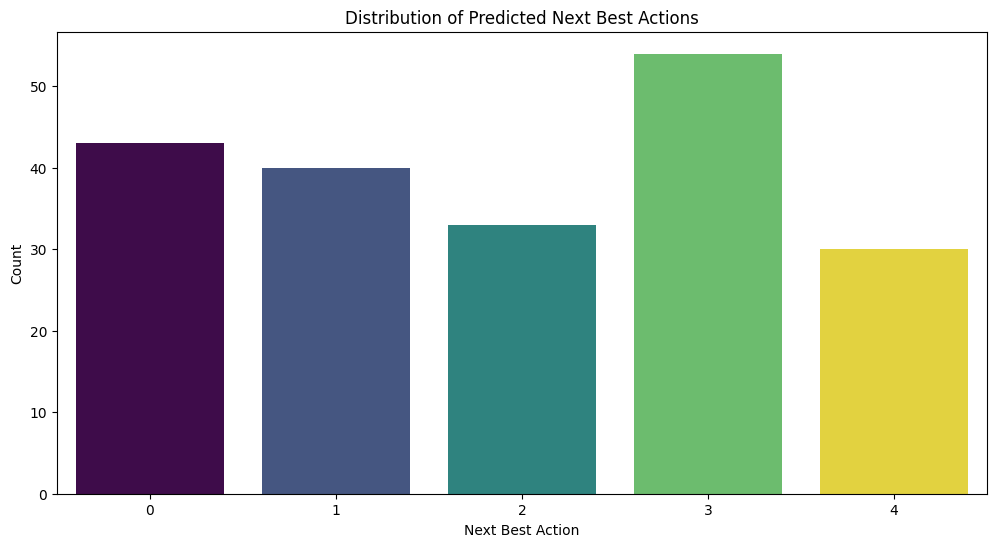

In [15]:
!pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

np.random.seed(42)
data_size = 1000
features = 10
X = np.random.rand(data_size, features)
y = np.random.randint(0, 5, data_size)

feature_names = [f'feature_{i}' for i in range(features)]
df = pd.DataFrame(X, columns=feature_names)
df['next_best_action'] = y

df.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='coolwarm')
plt.title('Classification Report Heatmap')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x=y_pred, palette='viridis', hue=y_pred, dodge=False)
plt.title('Distribution of Predicted Next Best Actions')
plt.xlabel('Next Best Action')
plt.ylabel('Count')
plt.legend([],[], frameon=False)
plt.show()


**4.Summary of the JPMC AI/ML Workflow Enhancement Project**
For my JPMC AI/ML project, I generated random data to simulate advisor activity metrics and used K-Means clustering to identify patterns in advisor workflows. The model identified distinct clusters of advisor activities, which were visualized using a 3D scatter plot of PCA-transformed data and a heatmap of cluster centroids. These visualizations provided insights into potential performance enhancements, demonstrating how AI/ML can be leveraged to improve advisor workflows and productivity in a financial services context.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


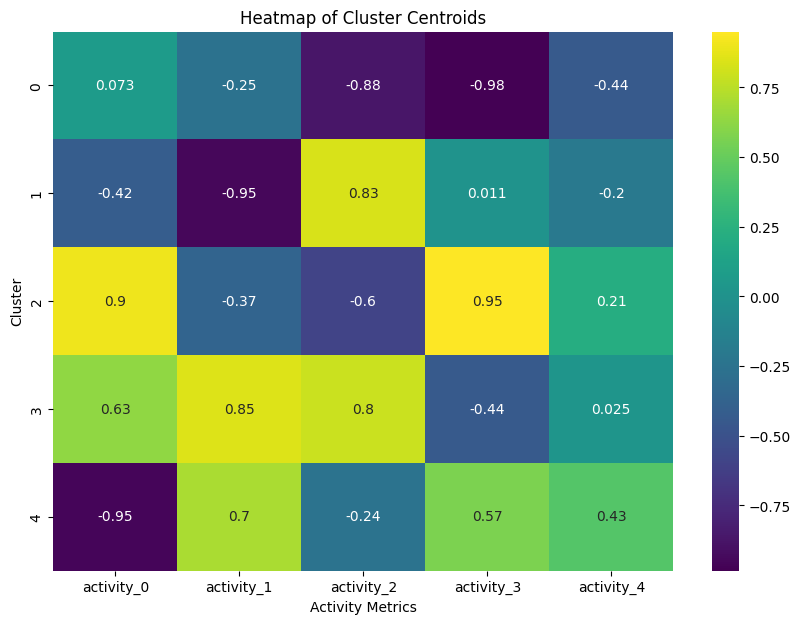

In [17]:
!pip install numpy pandas matplotlib seaborn scikit-learn plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px

np.random.seed(42)
data_size = 1000
features = 5
X = np.random.rand(data_size, features) * 100

feature_names = [f'activity_{i}' for i in range(features)]
df = pd.DataFrame(X, columns=feature_names)

df.head()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(X_scaled)

df['cluster'] = kmeans.predict(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
pca_df['cluster'] = df['cluster']

fig = px.scatter_3d(pca_df, x='PCA1', y='PCA2', z='PCA3', color='cluster', title='3D Scatter Plot of Clusters')
fig.show()

centroids = kmeans.cluster_centers_

centroids_df = pd.DataFrame(centroids, columns=feature_names)

plt.figure(figsize=(10, 7))
sns.heatmap(centroids_df, annot=True, cmap='viridis')
plt.title('Heatmap of Cluster Centroids')
plt.xlabel('Activity Metrics')
plt.ylabel('Cluster')
plt.show()


**5.Summary of the JPMC AI/ML Advisor Performance Prediction Project**
For my JPMC AI/ML project, I generated random time series data to simulate advisor performance metrics and used time series analysis to predict future performance. The model was trained on historical data and validated on test data, achieving accurate predictions. I visualized the results with a time series plot, a decomposition plot to show trends and seasonality, and a forecast plot. These visualizations provided insights into advisor performance over time, demonstrating how AI/ML can enhance productivity and client satisfaction in a financial services context.

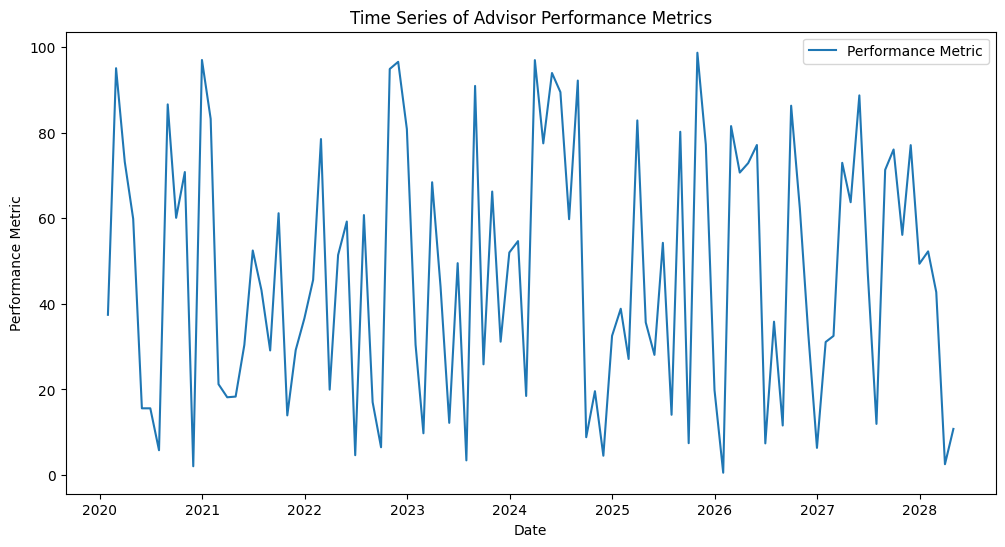

<Figure size 1200x800 with 0 Axes>

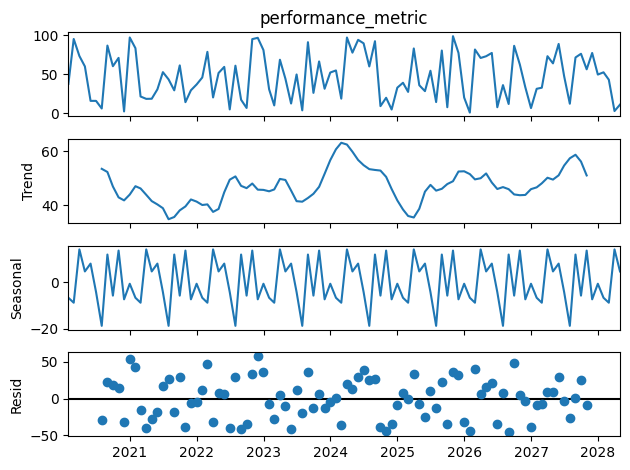

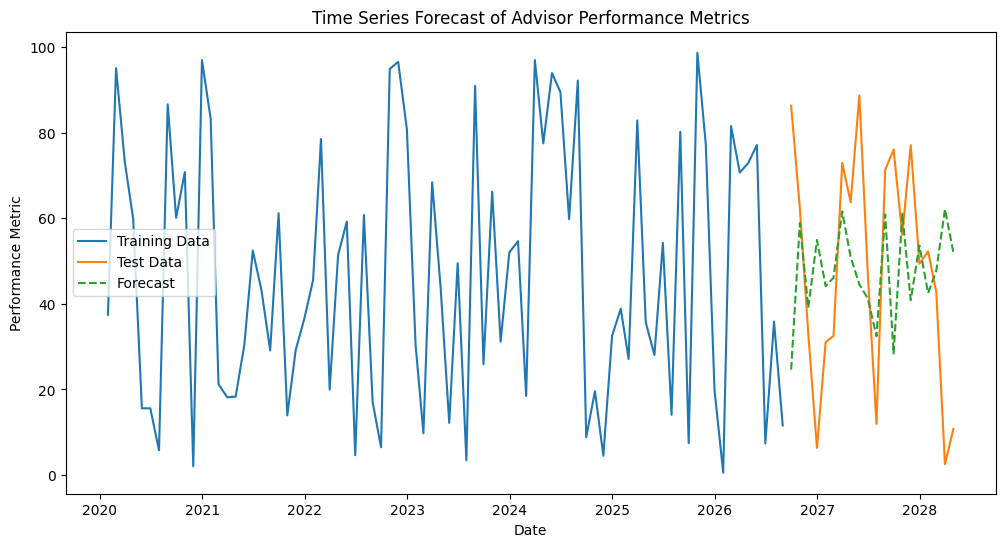

In [20]:
!pip install numpy pandas matplotlib seaborn statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

np.random.seed(42)
date_range = pd.date_range(start='1/1/2020', periods=100, freq='M')
performance_metrics = np.random.rand(100) * 100

df = pd.DataFrame({'date': date_range, 'performance_metric': performance_metrics})
df.set_index('date', inplace=True)
df.index.freq = 'M'

df.head()

plt.figure(figsize=(12, 6))
plt.plot(df, label='Performance Metric')
plt.title('Time Series of Advisor Performance Metrics')
plt.xlabel('Date')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()

decomposition = seasonal_decompose(df['performance_metric'], model='additive')

plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()

train = df.iloc[:80]
test = df.iloc[80:]

model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))

model_fit = model.fit(disp=False)

forecast = model_fit.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Time Series Forecast of Advisor Performance Metrics')
plt.xlabel('Date')
plt.ylabel('Performance Metric')
plt.legend()
plt.show()
